In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
from matplotlib.dates import DateFormatter
import datetime
import os

import locale 

import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature

In [3]:
locale.setlocale(locale.LC_TIME, "es_ES");

In [4]:
plt.rcParams['figure.figsize'] = (10, 4)

In [5]:
HOME=os.environ['HOME']
USER=os.environ['USER']   

In [6]:
if os.uname().nodename.lower().find('eemmmbp') != -1:
    imagesDir = HOME + '/Dropbox/Oceanografia/Analisis/SSTGlobalAnalysis/images'
elif os.uname().nodename.lower().find('rossby') != -1:
    imagesDir = HOME + '/Analisis/SSTGlobalAnalysis/images'
    dataDir   = HOME + '/Analisis/SSTGlobalAnalysis/data'

In [7]:
Titulos = ['Oceano Global','AtlanticoNorte', 'Demarcación marina levantino-balear', 'Demarcación marina noratlántica','Demarcación marina canaria','Demarcación sudatlántica','Demarcación Estrecho y Alborán']
Titulos_short = ['GO','NAtl','LEB', 'NOR','CAN','SUD','ESA']

In [8]:
iarea=4

In [9]:
titulo = Titulos[iarea]
titulo_short = Titulos_short[iarea]

In [10]:
FileIn =  './data/sstLD_anom_'+titulo_short+'.nc'
FileOut = './images/map_sstd_anom_'+titulo_short+'.png'
Title  = 'Anomalia de temperatura superficial en el '+ titulo

In [24]:
# Load the data from the .txt file
lon, lat = [], []
if titulo_short == 'CAN' or titulo_short == 'ESA' or titulo_short ==  'LEB' or titulo_short ==  'NOR' or titulo_short ==  'SUD' :
    with open('./LimiteDemarcaciones/Demarcacion'+titulo_short+'.txt', 'r') as f:
        for line in f:
            # Split the line by whitespace and append the values
            longitude, latitude = map(float, line.split())
            lon.append(longitude)
            lat.append(latitude)

In [25]:
escalaLand='50m'
if titulo_short == 'NH':
        escalaLand='110m'
elif titulo_short == 'SH':
        escalaLand='110m'
elif titulo_short == 'GO':
        escalaLand='110m'

In [26]:
data = xr.open_dataset(FileIn)
sst = data.sst

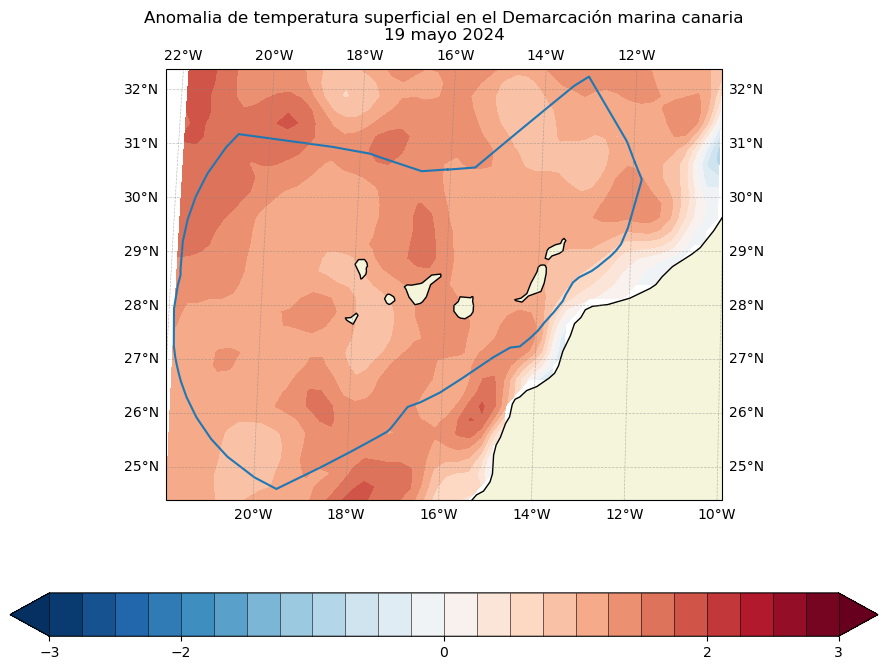

In [27]:
fig = plt.figure(figsize=(14,8))
ax = plt.axes(projection=ccrs.Robinson())

land = cartopy.feature.NaturalEarthFeature('physical', 
                'land', edgecolor='k', scale = escalaLand ,
                facecolor=cfeature.COLORS['land'])


ax.add_feature(land, facecolor='beige')
    
cm=ax.contourf(sst.lon,sst.lat,sst, levels=np.arange(-3,3.1,0.25), 
               transform=ccrs.PlateCarree(),
               cmap = plt.cm.RdBu.reversed(),
               vmin = -3,vmax = 3,extend='both')

ax.plot(lon, lat, transform=ccrs.PlateCarree())

cbar=fig.colorbar(cm,ax=ax, location='bottom',
                  shrink=.8, ticks=[-3,-2,0,2,3], 
                  drawedges=True)

ax.gridlines(draw_labels=True, linewidth=.5, 
             color='gray', alpha=0.5, linestyle='--')

ax.set_title(Title + '\n' +
             sst.time.dt.strftime("%d %B %Y").values);

plt.savefig(FileOut)

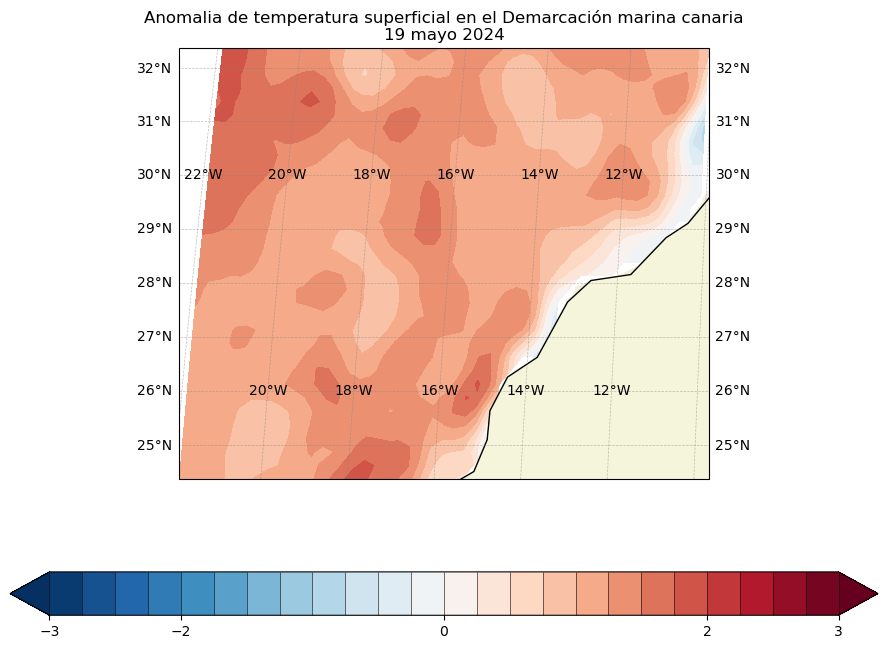

In [24]:
fig = plt.figure(figsize=(14,8))
#ax = plt.axes(projection=ccrs.LambertAzimuthalEqualArea(central_longitude=0.0, central_latitude=0.0))
ax = plt.axes(projection=ccrs.Mollweide(central_longitude=0))

land = cartopy.feature.NaturalEarthFeature('physical', 
                'land', edgecolor='k', scale = '110m' ,
                facecolor=cfeature.COLORS['land'])

ax.add_feature(land, facecolor='beige')
ax.add_feature(cfeature.LAND)
    
cm=ax.contourf(sst.lon,sst.lat,sst, levels=np.arange(-3,3.1,0.25), 
               transform=ccrs.PlateCarree(),
               cmap = plt.cm.RdBu.reversed(),
               vmin = -3,vmax = 3,extend='both')

cbar=fig.colorbar(cm,ax=ax, location='bottom',
                  shrink=.8, ticks=[-3,-2,0,2,3], 
                  drawedges=True)

ax.gridlines(draw_labels=True, linewidth=.5, 
             color='gray', alpha=0.5, linestyle='--')

ax.set_title(Title + '\n' +
             sst.time.dt.strftime("%d %B %Y").values);

(array([4.0000e+01, 6.5000e+01, 7.7000e+01, 1.0700e+02, 1.9400e+02,
        2.4500e+02, 3.5100e+02, 4.2500e+02, 5.3300e+02, 7.3400e+02,
        9.8500e+02, 1.4730e+03, 2.2810e+03, 3.4820e+03, 5.4300e+03,
        8.6570e+03, 1.2512e+04, 1.8699e+04, 2.7254e+04, 3.2933e+04,
        4.1229e+04, 4.8723e+04, 5.4909e+04, 5.6016e+04, 5.0755e+04,
        4.1888e+04, 3.4383e+04, 2.6161e+04, 1.9964e+04, 1.6241e+04,
        1.2586e+04, 8.7180e+03, 5.4570e+03, 3.4680e+03, 2.0250e+03,
        1.3370e+03, 1.0770e+03, 9.0300e+02, 7.1600e+02]),
 array([-4.        , -3.79487179, -3.58974359, -3.38461538, -3.17948718,
        -2.97435897, -2.76923077, -2.56410256, -2.35897436, -2.15384615,
        -1.94871795, -1.74358974, -1.53846154, -1.33333333, -1.12820513,
        -0.92307692, -0.71794872, -0.51282051, -0.30769231, -0.1025641 ,
         0.1025641 ,  0.30769231,  0.51282051,  0.71794872,  0.92307692,
         1.12820513,  1.33333333,  1.53846154,  1.74358974,  1.94871795,
         2.15384615,  2.3589

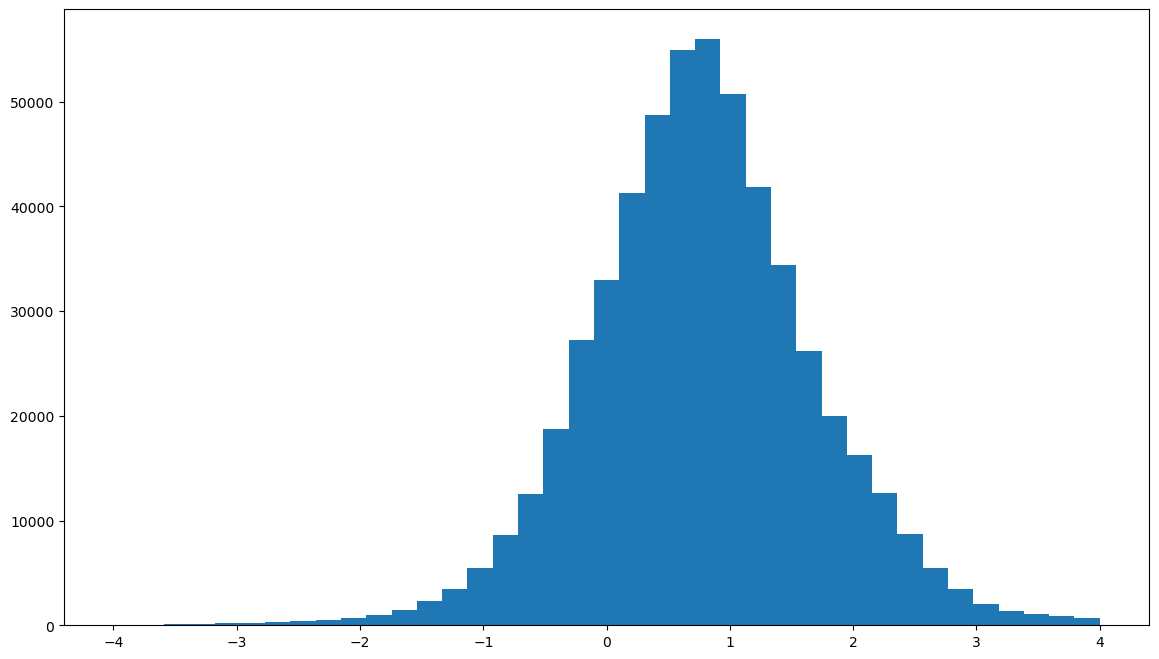

In [12]:
fig , ax = plt.subplots(figsize=(14,8))
ax.hist(sst.values.flatten(),np.linspace(-4, 4, 40))